In [53]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [54]:
entries = []
responses = []
grades = []
with open('schell8.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        if (row[1] == ' DIFFEREN CALCULUS FOR SCIENCE '):
            if "xml" not in row[5]:
                entries.append((row[1], row[3], row[5]))
                responses.append(row[5])
                grades.append(row[3])

In [16]:
vectorizer = CountVectorizer(min_df=1, stop_words = 'english')


In [17]:
R = vectorizer.fit_transform(responses)

In [18]:
vectorizer.vocabulary_

{u'0833333': 0,
 u'10': 1,
 u'11': 2,
 u'12': 3,
 u'14': 4,
 u'16': 5,
 u'18': 6,
 u'18259743': 7,
 u'25': 8,
 u'2cos': 9,
 u'2x': 10,
 u'32': 11,
 u'32x': 12,
 u'3e': 13,
 u'3xcosx': 14,
 u'5log': 15,
 u'5log10': 16,
 u'5log3': 17,
 u'5x': 18,
 u'6x': 19,
 u'able': 20,
 u'absolute': 21,
 u'absoulute': 22,
 u'acceleration': 23,
 u'accelration': 24,
 u'accept': 25,
 u'actually': 26,
 u'acutal': 27,
 u'acutally': 28,
 u'add': 29,
 u'adding': 30,
 u'addition': 31,
 u'additonal': 32,
 u'advance': 33,
 u'afraid': 34,
 u'afternoon': 35,
 u'aid': 36,
 u'algebra': 37,
 u'algebraically': 38,
 u'alright': 39,
 u'alt': 40,
 u'amp': 41,
 u'angle': 42,
 u'angles': 43,
 u'annoying': 44,
 u'answer': 45,
 u'answers': 46,
 u'apart': 47,
 u'apparently': 48,
 u'application': 49,
 u'applied': 50,
 u'apply': 51,
 u'applying': 52,
 u'approach': 53,
 u'approaches': 54,
 u'approaching': 55,
 u'approches': 56,
 u'approximate': 57,
 u'arccos': 58,
 u'arccsine': 59,
 u'arcsin': 60,
 u'arcsine': 61,
 u'arctan': 6

In [19]:
i = 0
for resp in responses:
    print i, resp
    i = i + 1

0  How to graph derivatives.
1  <img src="elementpartimage?modulesessionitempart=18259743" alt="" />   Th﻿is is the problem that I didn't fully understand and need more practice on. Another question that was unclear to me was the question that ask for the inverse function of f(x)=10/x, I don't quite understand why the inverse function would be the exaxt equation duplicated.
2  Expanding upon logrithmic functions.
3  I feel comfortable with this topic.
4  The one thing from this learning module that I am still slightly confused about is the meaning of x as the exponent in the graph equation.
5  Matching graphs to functions such as f(x)=6^(6x+7). 
6  Nothing really. I understand mostly everything. 
7  I still find inverse trig functions difficult. It takes me a while to do.. But I guess I just need more practice :)
8  I am having trouble with drawing the graphs.
9  The inverses of the trig functions and how angles pertain to them.
10  The sandwich theorem is still confusing and misleadin

In [21]:

pca = PCA(n_components=0.6)
pca.fit(R.toarray())



PCA(copy=True, n_components=0.6, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([ 0.05795852,  0.03869448,  0.02859434,  0.02674097,  0.02346875,
        0.01922372,  0.01837864,  0.01760503,  0.01686846,  0.0158582 ,
        0.01548739,  0.01458943,  0.01438759,  0.01391981,  0.01329495,
        0.01249749,  0.01237137,  0.01194857,  0.01153384,  0.01144016,
        0.01108155,  0.01098991,  0.01058876,  0.01020641,  0.00961467,
        0.009338  ,  0.0090857 ,  0.00887625,  0.00883553,  0.00857288,
        0.00832437,  0.00813011,  0.00777022,  0.0075368 ,  0.0074161 ,
        0.00719174,  0.00714798,  0.00690533,  0.00657993,  0.00653611,
        0.00639906,  0.00633725,  0.00615357,  0.00604316,  0.00589535,
        0.00562847])

In [23]:
len(pca.explained_variance_ratio_)

46

In [24]:
pca.components_.shape

(46, 876)

In [25]:
R_t = pca.transform(R.toarray())

In [26]:
R_t.shape

(574, 46)

In [27]:
len(entries)

574

In [56]:
Y = np.array(grades, dtype = float)

In [57]:
Y.shape

(574,)

In [28]:
X = pd.DataFrame(R_t)

In [31]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.111875,0.467369,0.316335,-0.421083,0.131741,-0.036976,0.165529,-0.113150,0.120895,0.264156,...,-0.155386,-0.224106,0.109751,-0.070011,0.090120,-0.011359,0.054621,-0.147286,0.148919,-0.001738
1,0.136069,1.677317,-2.880901,0.226776,-1.085316,-1.023206,-1.834095,1.111220,-0.513669,-0.577693,...,0.435531,-0.292432,-0.052416,-0.241202,-0.877210,0.381077,0.484187,-0.031992,-0.058280,-0.240729
2,-0.093717,-0.168508,0.293523,0.127430,-0.588858,0.041224,0.215229,-0.192463,0.135273,0.027606,...,-0.095787,-0.039247,-0.025450,0.034476,-0.043480,0.057231,0.039026,-0.004615,0.065702,0.104714
3,-0.088479,-0.265067,0.114694,-0.242733,0.050168,-0.085934,-0.006615,-0.006016,0.042294,0.029761,...,0.071688,-0.029991,0.005241,0.000430,0.019639,-0.067513,0.131434,-0.115888,-0.071213,0.181888
4,-0.096996,0.813925,0.222348,0.537225,0.814012,-0.279967,0.636321,0.272740,-0.061601,0.272605,...,0.230369,0.136172,0.314281,0.051069,-0.393169,-0.143122,-0.058569,-0.025813,-0.007141,0.070147


In [55]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
%matplotlib inline 

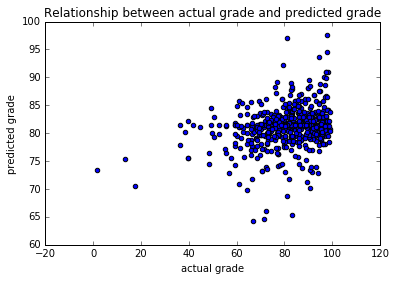

In [61]:
# your turn
plt.scatter(Y, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

In [62]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 46


In [64]:
print np.mean((Y - lm.predict(X)) ** 2)

158.953060765
